In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

## Preprocessing

##### Load and inspect data

In [2]:
raw_data = pd.read_csv('dataset.csv')
print(raw_data.head())
print(raw_data.shape)
print('Class - saved: {:.2f}%'.format(100*sum(raw_data.label=='saved')/raw_data.shape[0]))
print('Class - unsaved: {:.2f}%'.format(100*sum(raw_data.label=='unsaved')/raw_data.shape[0]))

   danceability  energy  key  loudness  speechiness  acousticness  \
0         0.823   0.467    0   -10.394        0.301         0.543   
1         0.445   0.378    0    -8.043        0.031         0.318   
2         0.810   0.451   10    -6.348        0.249         0.152   
3         0.637   0.569    6    -5.858        0.550         0.173   
4         0.747   0.492   11    -8.399        0.110         0.271   

   instrumentalness  liveness  valence    tempo  time_signature  label  \
0          0.000000     0.135   0.6180   95.024               4  saved   
1          0.041600     0.142   0.0729   71.835               4  saved   
2          0.053700     0.108   0.3590   85.417               4  saved   
3          0.000000     0.180   0.1480  140.269               4  saved   
4          0.000011     0.263   0.1890  124.870               4  saved   

   mode_major  mode_minor  
0           0           1  
1           1           0  
2           0           1  
3           1           0  


##### Create test / train split

In [3]:
x = raw_data.drop(['label'], axis=1)
y = raw_data.label
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=252)
print(X_train.head())
print(y_train.head())
print('Train Class - saved: {}'.format(sum(y_train == 'saved')))
print('Train Class - unsaved: {}'.format(sum(y_train == 'unsaved')))
print('Test Class - saved: {}'.format(sum(y_test == 'saved')))
print('Test Class - unsaved: {}'.format(sum(y_test == 'unsaved')))

      danceability  energy  key  loudness  speechiness  acousticness  \
190          0.674   0.661    7    -7.973       0.0619       0.12800   
3139         0.637   0.864    8    -4.381       0.0468       0.48400   
478          0.564   0.722    1    -5.590       0.1240       0.16200   
1922         0.761   0.905    2    -3.797       0.1130       0.00269   
2601         0.359   0.572    4    -5.005       0.0302       0.00747   

      instrumentalness  liveness  valence    tempo  time_signature  \
190           0.000020    0.2830    0.458   95.966               4   
3139          0.000000    0.2220    0.706   99.995               4   
478           0.000000    0.0931    0.276   99.083               4   
1922          0.000000    0.0610    0.583  113.045               4   
2601          0.000945    0.2850    0.285  137.845               3   

      mode_major  mode_minor  
190            1           0  
3139           1           0  
478            0           1  
1922           1      

##### Scale Features

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# cols_to_scale = ['danceability', 'energy', 'loudness', 'speechiness', 
# 'acousticness','instrumentalness','liveness','valence','tempo']
cols_to_scale = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
'acousticness','instrumentalness','liveness','valence','tempo','time_signature']

X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_train_scaled = X_train_scaled.to_numpy()
y_train = y_train.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()
y_test = y_test.to_numpy()

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


## Hyperparameter Tuning

In [35]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
import time

scorer = make_scorer(precision_score, pos_label='saved')

param_grid = [{'n_estimators': np.arange(10, 360, 10),
               'learning_rate': [1, .1, .01, .001, .0001]}
             ]

start_time = time.time()
adaboost_search = GridSearchCV(AdaBoostClassifier(random_state=62), param_grid=param_grid, scoring=scorer, cv=5, return_train_score=True, n_jobs=-2)
adaboost_search.fit(X_train_scaled, y_train)
adaboost_search_results = pd.DataFrame(adaboost_search.cv_results_)
print('Experiment Time: {:6.4f} seconds'.format(time.time() - start_time))
print(adaboost_search_results)

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Experiment Time: 566.5214 seconds
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.085252      0.017039         0.007071        0.004999   
1         0.183349      0.010319         0.009935        0.003748   
2         0.274206      0.014034         0.010825        0.002058   
3         0.384708      0.017336         0.014523        0.005480   
4         0.469777      0.021242         0.016713        0.003602   
..             ...           ...              ...             ...   
170       2.687331      0.145457         0.107892        0.020422   
171       2.671494      0.105267         0.090487        0.020738   
172       3.184730      0.191199         0.120251        0.021151   
173       3.253518      0.057206         0.109889        0.014120   
174       3.057729      0.157178         0.096874        0.011404   

    param_learning_rate param_n_estimators  \
0                     1                 10   
1                     1                 20   

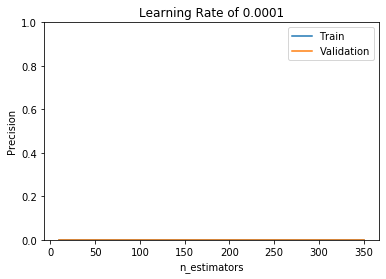

0.0


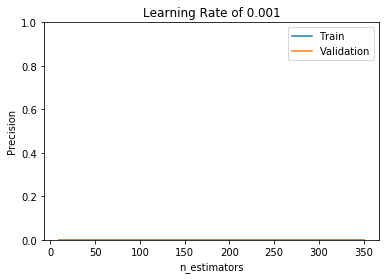

0.0


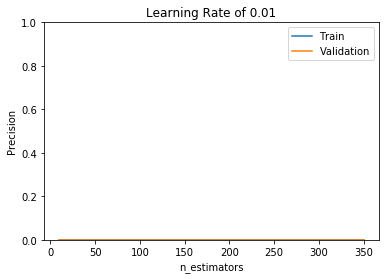

0.0


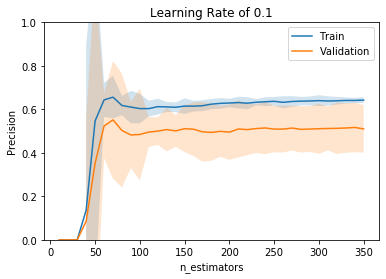

0.4477370237313237


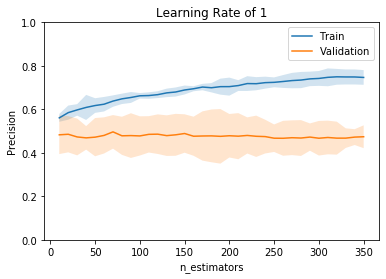

0.47675914745223086


In [47]:
from scipy.stats import t
from matplotlib import pyplot as plt

def plot_adaboost_search_results(search, results):
    results = results.copy()
    results['validation_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[0], axis=1)
    results['validation_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[1], axis=1)
    results['train_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[0], axis=1)
    results['train_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[1], axis=1)
    results.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score'], axis=1, inplace=True)
    
    learning_rates = np.unique(results.param_learning_rate.values)
    
    for learning_rate in learning_rates:
        df_current = None
        df_current = results.copy()
        df_current = df_current[df_current.param_learning_rate == learning_rate]
        fig = plt.figure()
        plt.plot(df_current.param_n_estimators, df_current.mean_train_score)
        plt.plot(df_current.param_n_estimators, df_current.mean_test_score)
        df_current = df_current.astype({'param_n_estimators': 'float64'}, copy=True)
        title = 'Learning Rate of {}'.format(learning_rate)
        plt.title(title)
        plt.xlabel('n_estimators')
        plt.ylabel('Precision')
        plt.ylim(top=1.0)
        plt.ylim(bottom=0.0)
        plt.fill_between(df_current.param_n_estimators, df_current.train_lower_ci, df_current.train_upper_ci, alpha=0.2)
        plt.fill_between(df_current.param_n_estimators, df_current.validation_lower_ci, df_current.validation_upper_ci, alpha=0.2)
        plt.legend(['Train', 'Validation'])
        plt.show()
        print(np.mean(df_current.mean_test_score.values))
#         filetitle = 'Model Complexity Curve: Learning Rate of {:d}e-4.png'.format(int(learning_rate*10000))
#         print(filetitle)
#         fig.savefig(filetitle)
    return results
    
res1 = plot_adaboost_search_results(adaboost_search, adaboost_search_results)

In [42]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
import time

scorer = make_scorer(precision_score, pos_label='saved')

# param_grid = [{'n_estimators': [10, 30, 50, 70, 85, 100, 125, 150, 175, 200, 250, 300],
#                'learning_rate': [1, .1, .01, .001, .0001, .00001]}
#              ]


param_grid = [{'n_estimators': np.arange(10, 360, 10),
               'learning_rate': [.03, .05, .07, .09, 0.3, 0.5, 0.7, 0.9]}
             ]

start_time = time.time()
adaboost_search_2 = GridSearchCV(AdaBoostClassifier(random_state=62), param_grid=param_grid, scoring=scorer, cv=5, return_train_score=True, n_jobs=-1)
adaboost_search_2.fit(X_train_scaled, y_train)
adaboost_search_results_2 = pd.DataFrame(adaboost_search_2.cv_results_)
print('Experiment Time: {:6.4f} seconds'.format(time.time() - start_time))
print(adaboost_search_results)

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Experiment Time: 791.3172 seconds
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.085252      0.017039         0.007071        0.004999   
1         0.183349      0.010319         0.009935        0.003748   
2         0.274206      0.014034         0.010825        0.002058   
3         0.384708      0.017336         0.014523        0.005480   
4         0.469777      0.021242         0.016713        0.003602   
..             ...           ...              ...             ...   
170       2.687331      0.145457         0.107892        0.020422   
171       2.671494      0.105267         0.090487        0.020738   
172       3.184730      0.191199         0.120251        0.021151   
173       3.253518      0.057206         0.109889        0.014120   
174       3.057729      0.157178         0.096874        0.011404   

    param_learning_rate param_n_estimators  \
0                     1                 10   
1                     1                 20   

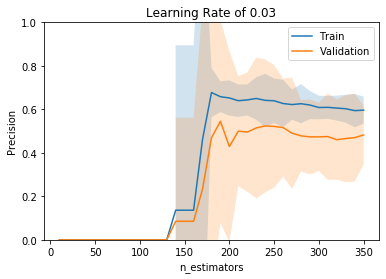

0.26516600020455555


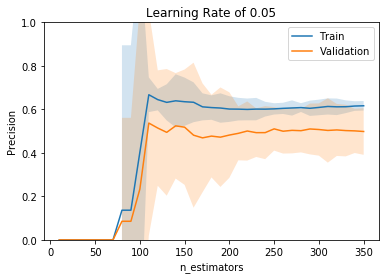

0.3685647797620137


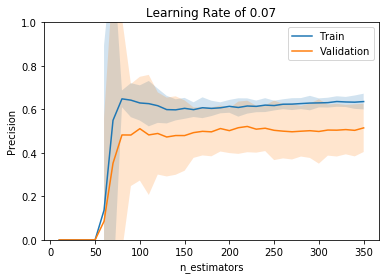

0.41206406182426214


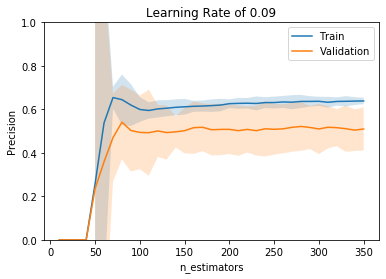

0.4376773985536391


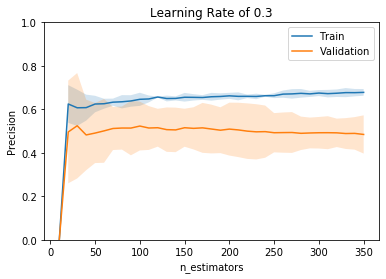

0.48792223983847427


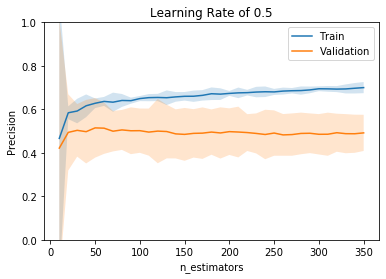

0.49218380322013006


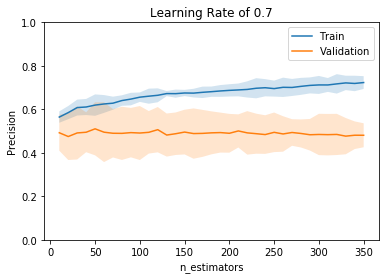

0.4902217030794951


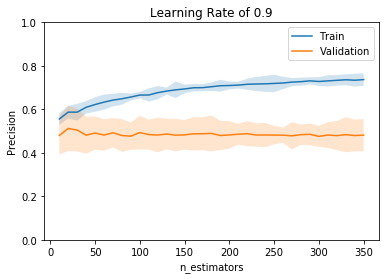

0.48507501017511806


In [48]:
res2 = plot_adaboost_search_results(adaboost_search_2, adaboost_search_results_2)

In [50]:
criteria = (res2.param_learning_rate == 0.7) & (res2.param_n_estimators == 10)
res2[criteria]
# best_adaboost

,param_learning_rate,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score,validation_lower_ci,validation_upper_ci,train_lower_ci,train_upper_ci
210,0.7,10,0.492714,0.02971,0.56486,0.009401,0.410224,0.575203,0.538759,0.590961


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV

import time

param_grid = [{   'kernel': ['linear'],
                  'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]},
              {
                  'kernel': ['sigmoid', 'rbf'],
                  'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
                  'gamma': [10, 1, 0.1, 0.01]}
#               {   'kernel': ['poly'],
#                   'C':[100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
#                   'degree': [1, 3, 5, 7, 9, 11, 13, 15],
#                   'gamma': [10, 1, 0.1, 0.01]}
             ]

scorer = make_scorer(precision_score, pos_label='saved')

start_time = time.time()
svm_search = GridSearchCV(SVC(gamma='scale', class_weight='balanced', random_state=75), param_grid=param_grid, scoring=scorer, cv=5, return_train_score=True, verbose=8)
svm_search.fit(X_train_scaled, y_train)
svm_search_results = pd.DataFrame(svm_search.cv_results_)
print('Experiment Time: {:6.4f} seconds'.format(time.time() - start_time))
print(svm_search_results)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=100, kernel=linear, score=0.432258064516129, total=   3.0s
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] .. C=100, kernel=linear, score=0.44345238095238093, total=   3.6s
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] ... C=100, kernel=linear, score=0.4492753623188406, total=   3.6s
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s


[CV] ... C=100, kernel=linear, score=0.4501510574018127, total=   3.5s
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.3s remaining:    0.0s


[CV] ... C=100, kernel=linear, score=0.4261168384879725, total=   4.1s
[CV] C=100, kernel=sigmoid ...........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.5s remaining:    0.0s


[CV] ... C=100, kernel=sigmoid, score=0.416289592760181, total=   0.0s
[CV] C=100, kernel=sigmoid ...........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.8s remaining:    0.0s


[CV] .. C=100, kernel=sigmoid, score=0.3744493392070485, total=   0.0s
[CV] C=100, kernel=sigmoid ...........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.0s remaining:    0.0s


[CV] .. C=100, kernel=sigmoid, score=0.3983402489626556, total=   0.0s
[CV] C=100, kernel=sigmoid ...........................................
[CV] . C=100, kernel=sigmoid, score=0.32558139534883723, total=   0.1s
[CV] C=100, kernel=sigmoid ...........................................
[CV] .. C=100, kernel=sigmoid, score=0.3688212927756654, total=   0.1s
[CV] C=100, kernel=rbf ...............................................
[CV] ..... C=100, kernel=rbf, score=0.44933920704845814, total=   0.6s
[CV] C=100, kernel=rbf ...............................................
[CV] ..... C=100, kernel=rbf, score=0.44761904761904764, total=   0.6s
[CV] C=100, kernel=rbf ...............................................
[CV] ...... C=100, kernel=rbf, score=0.4166666666666667, total=   0.6s
[CV] C=100, kernel=rbf ...............................................
[CV] ..... C=100, kernel=rbf, score=0.41739130434782606, total=   0.7s
[CV] C=100, kernel=rbf ...............................................
[CV] .

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................... C=0.01, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.001, kernel=linear, score=0.42475728155339804, total=   0.0s
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.001, kernel=linear, score=0.43301435406698563, total=   0.0s
[CV] C=0.001, kernel=linear ..........................................
[CV] .. C=0.001, kernel=linear, score=0.427536231884058, total=   0.0s
[CV] C=0.001, kernel=linear ..........................................
[CV] .

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.001, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=0.001, kernel=sigmoid .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.001, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=0.001, kernel=sigmoid .........................................
[CV]  C=0.001, kernel=sigmoid, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=sigmoid .........................................
[CV]  C=0.001, kernel=sigmoid, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=sigmoid .........................................
[CV]  C=0.001, kernel=sigmoid, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=rbf .............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................... C=0.001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.001, kernel=rbf .............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................... C=0.001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.4087912087912088, total=   0.1s
[CV] C=0.0001, kernel=linear .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.0001, kernel=linear, score=0.0, total=   0.0s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=0.4100877192982456, total=   0.1s
[CV] C=0.0001, kernel=linear .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.0001, kernel=linear, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=linear .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.0001, kernel=linear, score=0.0, total=   0.0s
[CV] C=0.0001, kernel=linear .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=0.0001, kernel=linear, score=0.0, total=   0.0s
[CV] C=0.0001, kernel=sigmoid ........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. C=0.0001, kernel=sigmoid, score=0.0, total=   0.2s
[CV] C=0.0001, kernel=sigmoid ........................................
[CV]  C=0.0001, kernel=sigmoid, score=0.4100877192982456, total=   0.1s
[CV] C=0.0001, kernel=sigmoid ........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. C=0.0001, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=sigmoid ........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. C=0.0001, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=sigmoid ........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. C=0.0001, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=rbf ............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. C=0.0001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=rbf ............................................
[CV] ... C=0.0001, kernel=rbf, score=0.4100877192982456, total=   0.1s
[CV] C=0.0001, kernel=rbf ............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. C=0.0001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=rbf ............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. C=0.0001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=0.0001, kernel=rbf ............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. C=0.0001, kernel=rbf, score=0.0, total=   0.1s
[CV] C=1e-05, kernel=linear ..........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................ C=1e-05, kernel=linear, score=0.0, total=   0.0s
[CV] C=1e-05, kernel=linear ..........................................
[CV] ................ C=1e-05, kernel=linear, score=0.0, total=   0.0s
[CV] C=1e-05, kernel=linear ..........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1e-05, kernel=linear, score=0.42824074074074076, total=   0.0s
[CV] C=1e-05, kernel=linear ..........................................
[CV]  C=1e-05, kernel=linear, score=0.43675417661097854, total=   0.0s
[CV] C=1e-05, kernel=linear ..........................................
[CV] . C=1e-05, kernel=linear, score=0.4368932038834951, total=   0.0s
[CV] C=1e-05, kernel=sigmoid .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=1e-05, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=1e-05, kernel=sigmoid .........................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............... C=1e-05, kernel=sigmoid, score=0.0, total=   0.1s
[CV] C=1e-05, kernel=sigmoid .........................................
[CV]  C=1e-05, kernel=sigmoid, score=0.4397905759162304, total=   0.1s
[CV] C=1e-05, kernel=sigmoid .........................................
[CV]  C=1e-05, kernel=sigmoid, score=0.44505494505494503, total=   0.1s
[CV] C=1e-05, kernel=sigmoid .........................................
[CV]  C=1e-05, kernel=sigmoid, score=0.4087912087912088, total=   0.1s
[CV] C=1e-05, kernel=rbf .............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................... C=1e-05, kernel=rbf, score=0.0, total=   0.1s
[CV] C=1e-05, kernel=rbf .............................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................... C=1e-05, kernel=rbf, score=0.0, total=   0.1s
[CV] C=1e-05, kernel=rbf .............................................
[CV] .... C=1e-05, kernel=rbf, score=0.4425087108013937, total=   0.1s
[CV] C=1e-05, kernel=rbf .............................................
[CV] ... C=1e-05, kernel=rbf, score=0.44089456869009586, total=   0.1s
[CV] C=1e-05, kernel=rbf .............................................
[CV] .... C=1e-05, kernel=rbf, score=0.4365079365079365, total=   0.1s
[CV] C=100, degree=1, kernel=poly ....................................
[CV]  C=100, degree=1, kernel=poly, score=0.432258064516129, total=   0.4s
[CV] C=100, degree=1, kernel=poly ....................................
[CV]  C=100, degree=1, kernel=poly, score=0.44345238095238093, total=   0.4s
[CV] C=100, degree=1, kernel=poly ....................................
[CV]  C=100, degree=1, kernel=poly, score=0.4476744186046512, total=   0.4s
[CV] C=100, degree=1, kernel=poly ............................

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ........ C=0.001, degree=1, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.001, degree=1, kernel=poly ..................................
[CV]  C=0.001, degree=1, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=0.001, degree=1, kernel=poly ..................................
[CV]  C=0.001, degree=1, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=0.001, degree=1, kernel=poly ..................................
[CV]  C=0.001, degree=1, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.4146341463414634, total=   0.0s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.413716814159292, total=   0.0s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.4105960264900662, total=   0.0s
[CV] C=0.001, degree=3, kernel=poly 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=0.0001, degree=1, kernel=poly, score=0.4100877192982456, total=   0.0s
[CV] C=0.0001, degree=1, kernel=poly .................................
[CV] ....... C=0.0001, degree=1, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=1, kernel=poly .................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV] ....... C=0.0001, degree=1, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=1, kernel=poly .................................
[CV] ....... C=0.0001, degree=1, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=3, kernel=poly .................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ....... C=0.0001, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.4100877192982456, total=   0.1s
[CV] C=0.0001, degree=3, kernel=poly .................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ....... C=0.0001, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV] ....... C=0.0001, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=3, kernel=poly .................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ....... C=0.0001, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.41150442477876104, total=   0.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4146341463414634, total=   0.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4105960264900662, total=   0.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4092920353982301, total=   0.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.41517857142857145, total=   0.0s
[CV] C=0.0001, degree=7, kernel=poly .................................
[CV]  C=0.0001, degree=7, kernel=poly, score=0.4161073825503356, total=   0.0s
[CV] C=0.0001, degree=7, ke

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ........ C=1e-05, degree=1, kernel=poly, score=0.0, total=   0.0s
[CV] C=1e-05, degree=1, kernel=poly ..................................
[CV]  C=1e-05, degree=1, kernel=poly, score=0.42824074074074076, total=   0.0s
[CV] C=1e-05, degree=1, kernel=poly ..................................
[CV]  C=1e-05, degree=1, kernel=poly, score=0.43675417661097854, total=   0.0s
[CV] C=1e-05, degree=1, kernel=poly ..................................
[CV]  C=1e-05, degree=1, kernel=poly, score=0.4368932038834951, total=   0.0s
[CV] C=1e-05, degree=3, kernel=poly ..................................
[CV] ........ C=1e-05, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=1e-05, degree=3, kernel=poly ..................................


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ........ C=1e-05, degree=3, kernel=poly, score=0.0, total=   0.0s
[CV] C=1e-05, degree=3, kernel=poly ..................................
[CV]  C=1e-05, degree=3, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=1e-05, degree=3, kernel=poly ..................................
[CV]  C=1e-05, degree=3, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=1e-05, degree=3, kernel=poly ..................................
[CV]  C=1e-05, degree=3, kernel=poly, score=0.40969162995594716, total=   0.0s
[CV] C=1e-05, degree=5, kernel=poly ..................................
[CV]  C=1e-05, degree=5, kernel=poly, score=0.4100877192982456, total=   0.0s
[CV] C=1e-05, degree=5, kernel=poly ..................................
[CV]  C=1e-05, degree=5, kernel=poly, score=0.41098901098901097, total=   0.0s
[CV] C=1e-05, degree=5, kernel=poly ..................................
[CV]  C=1e-05, degree=5, kernel=poly, score=0.4087912087912088, total=   0.0s
[CV] C=1e-05, degree=5, kernel=po

[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  2.7min finished
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Experiment Time: 161.2179 seconds
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        3.646139      0.350053         0.015171        0.002908     100   
1        0.128545      0.018574         0.024340        0.003060     100   
2        0.692612      0.025827         0.022738        0.001323     100   
3        0.531428      0.018559         0.018152        0.001829      10   
4        0.119622      0.002832         0.022940        0.002601      10   
..            ...           ...              ...             ...     ...   
83       0.112487      0.007821         0.018362        0.000807   1e-05   
84       0.110288      0.001335         0.019348        0.001367   1e-05   
85       0.113615      0.002862         0.018943        0.001252   1e-05   
86       0.115612      0.002662         0.018760        0.000722   1e-05   
87       0.125264      0.006964         0.020372        0.002524   1e-05   

   param_kernel param_degree                         

  param_C param_kernel param_degree  mean_test_score  std_test_score  \
0     100       linear          NaN         0.440245        0.009519   
1     100      sigmoid          NaN         0.376730        0.030713   
2     100          rbf          NaN         0.438679        0.018375   
3      10       linear          NaN         0.440318        0.008662   
4      10      sigmoid          NaN         0.375478        0.032766   

   mean_train_score  std_train_score  validation_lower_ci  \
0          0.443608         0.001287             0.413816   
1          0.367277         0.005267             0.291456   
2          0.799212         0.008082             0.387661   
3          0.443973         0.001507             0.416269   
4          0.364366         0.005167             0.284504   

   validation_upper_ci  train_lower_ci  train_upper_ci  
0             0.466674        0.440033        0.447182  
1             0.462004        0.352652        0.381902  
2             0.489696       

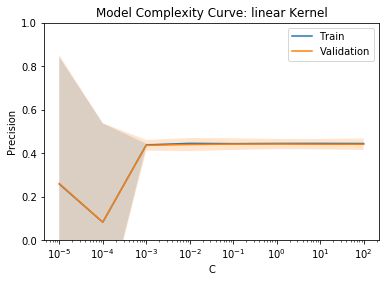

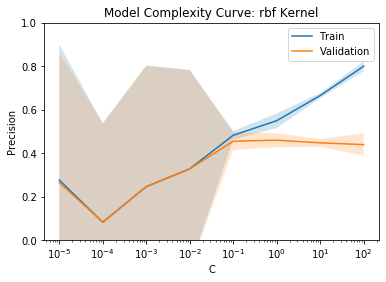

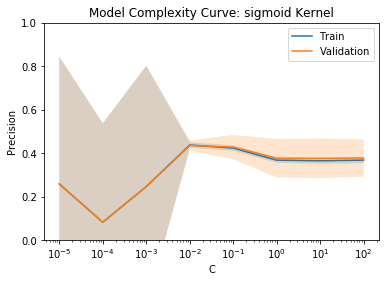

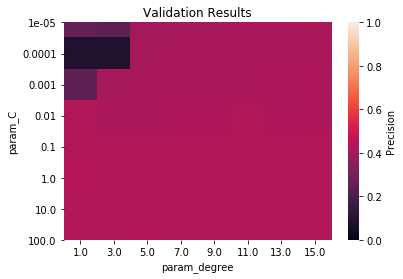

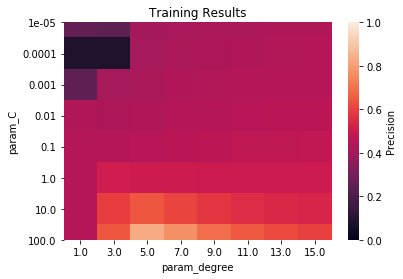

In [61]:
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sns

def plot_svm_search_results(search, results):
    results = results.copy()
 
    results['validation_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[0], axis=1)
    results['validation_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[1], axis=1)
    results['train_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[0], axis=1)
    results['train_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[1], axis=1)
    results.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score',
       'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score'], axis=1, inplace=True)
    
    print(results.head())
    
    kernels = np.unique(results.param_kernel.values)
    kernels = kernels[kernels != 'poly']
    print(kernels)
    
    for kernel in kernels:
        df_current = None
        df_current = results.copy()
        df_current = df_current[df_current.param_kernel == kernel]
        fig = plt.figure()
        plt.plot(df_current.param_C, df_current.mean_train_score)
        plt.plot(df_current.param_C, df_current.mean_test_score)
        df_current = df_current.astype({'param_C': 'float64'}, copy=True)
        title = 'Model Complexity Curve: {} Kernel'.format(kernel)
        plt.title(title)
        plt.xlabel('C')
        plt.ylabel('Precision')
        plt.xscale('log')
        plt.ylim(top=1.0)
        plt.ylim(bottom=0.0)
        plt.fill_between(df_current.param_C, df_current.train_lower_ci, df_current.train_upper_ci, alpha=0.2)
        plt.fill_between(df_current.param_C, df_current.validation_lower_ci, df_current.validation_upper_ci, alpha=0.2)
        plt.legend(['Train', 'Validation'])
        plt.show()
    
    poly_results = results[results.param_kernel == 'poly']
    poly_results = poly_results.astype({'param_C': 'float64', 'param_degree': 'float64'}, copy=True)
    
    validation_results = poly_results.pivot(index='param_C', columns='param_degree', values='mean_test_score')
    plt.figure()
    ax = plt.axes()
    sns.heatmap(validation_results, cbar_kws={'label': 'Precision'}, ax=ax, vmin=0.0, vmax=1.0)
    ax.set_title('Validation Results')
    train_results = poly_results.pivot(index='param_C', columns='param_degree', values='mean_train_score')
    plt.figure()
    ax = plt.axes()
    sns.heatmap(train_results, cbar_kws={'label': 'Precision'}, ax=ax, vmin=0.0, vmax=1.0)
    ax.set_title('Training Results')
    
    return results, train_results, validation_results, poly_results
    
overall_results, trn_results, vld_results, poly_results = plot_svm_search_results(svm_search, svm_search_results)


In [65]:
criteria = (overall_results.param_kernel == 'linear') & (overall_results.param_C == 1e-3)
print(overall_results[criteria])

   param_C param_kernel param_degree  mean_test_score  std_test_score  \
15   0.001       linear          NaN         0.435242        0.008961   

    mean_train_score  std_train_score  validation_lower_ci  \
15          0.437038         0.002069             0.410364   

    validation_upper_ci  train_lower_ci  train_upper_ci  
15             0.460121        0.431292        0.442783  


      param_C param_kernel  param_degree  mean_test_score  std_test_score  \
24  100.00000         poly           1.0         0.440612        0.008257   
25  100.00000         poly           3.0         0.433848        0.021467   
26  100.00000         poly           5.0         0.443091        0.018409   
27  100.00000         poly           7.0         0.438852        0.010229   
28  100.00000         poly           9.0         0.432380        0.014605   
..        ...          ...           ...              ...             ...   
83    0.00001         poly           7.0         0.412168        0.002458   
84    0.00001         poly           9.0         0.413989        0.002448   
85    0.00001         poly          11.0         0.416868        0.002108   
86    0.00001         poly          13.0         0.417961        0.004226   
87    0.00001         poly          15.0         0.422378        0.004920   

    mean_train_score  std_train_score  validation_lower_ci  \
24          0

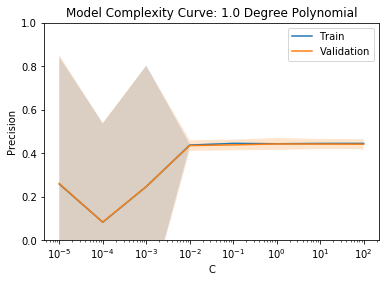

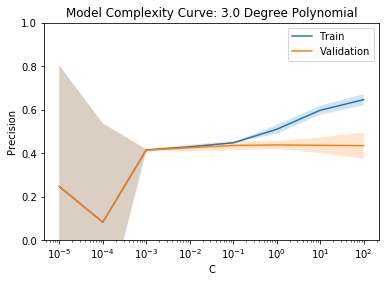

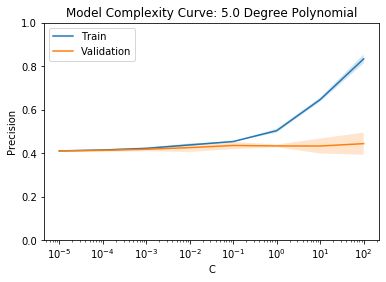

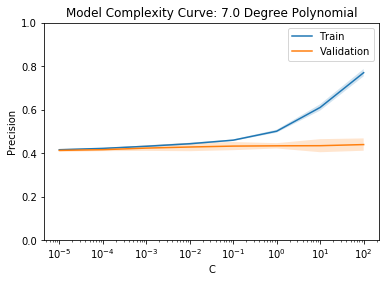

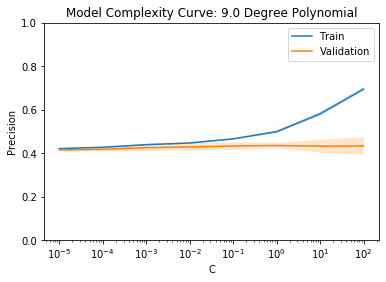

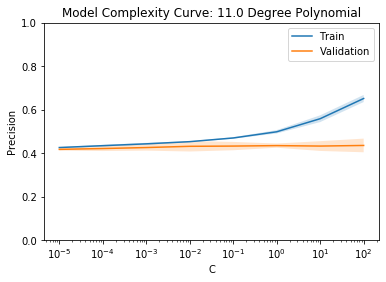

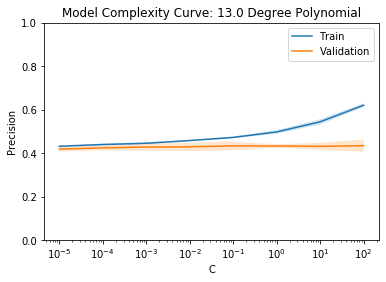

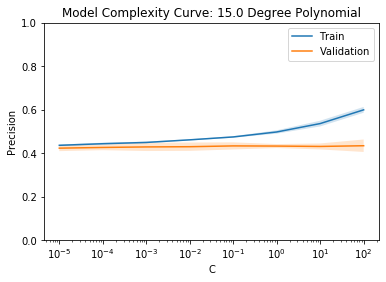

In [16]:
print(poly_results)

degrees = np.unique(poly_results.param_degree.values)

for degree in degrees:
    df_current = None
    df_current = poly_results.copy()
    df_current = df_current[df_current.param_degree == degree]
    fig = plt.figure()
    plt.plot(df_current.param_C, df_current.mean_train_score)
    plt.plot(df_current.param_C, df_current.mean_test_score)
    df_current = df_current.astype({'param_C': 'float64'}, copy=True)
    title = 'Model Complexity Curve: {} Degree Polynomial'.format(degree)
    plt.title(title)
    plt.xlabel('C')
    plt.ylabel('Precision')
    plt.xscale('log')
    plt.ylim(top=1.0)
    plt.ylim(bottom=0.0)
    plt.fill_between(df_current.param_C, df_current.train_lower_ci, df_current.train_upper_ci, alpha=0.2)
    plt.fill_between(df_current.param_C, df_current.validation_lower_ci, df_current.validation_upper_ci, alpha=0.2)
    plt.legend(['Train', 'Validation'])
    plt.show()

In [17]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

import time

hidden_layers_1 = [(x,x) for x in np.arange(1,31,1)]
hidden_layers_2 = [(x,x,x) for x in np.arange(1,31,1)]
param_grid = [{
                'hidden_layer_sizes': hidden_layers_1 + hidden_layers_2,
                'activation': ['logistic','relu','tanh'],
                'alpha': [1, .1, .01, .001, 0.0001, .00001, .000001, .0000001]
              }]

scorer = make_scorer(precision_score, pos_label='saved')

start_time = time.time()
nn_search = GridSearchCV(MLPClassifier(solver='lbfgs', random_state=193), param_grid=param_grid, scoring=scorer, cv=5, return_train_score=True, verbose=2)
nn_search.fit(X_train_scaled, y_train)
nn_search_results = pd.DataFrame(nn_search.cv_results_)
print('Experiment Time: {:6.4f} seconds'.format(time.time() - start_time))
print(nn_search_results)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(1, 1) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(1, 1) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(1, 1) .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetr

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(1, 1) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(1, 1) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(4, 4) .........
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=logistic, alpha=1, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.0s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9) ......
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(11, 11, 11), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(12, 12, 12), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(13, 13, 13), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(14, 14, 14), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(15, 15, 15), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(16, 16, 16), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(17, 17, 17), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(18, 18, 18), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(21, 21, 21), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(22, 22, 22), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(23, 23, 23), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(24, 24, 24), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25), total=   0.2s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(26, 26, 26), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27), total=   0.2s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(27, 27, 27), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(28, 28, 28), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29), total=   0.2s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(29, 29, 29), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30), total=   0.0s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30) ...
[CV]  activation=logistic, alpha=1, hidden_layer_sizes=(30, 30, 30), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1) .......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2) .......
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logis

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(8, 8, 8) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(8, 8, 8), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(8, 8, 8) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(8, 8, 8), total=   0.6s


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(9, 9, 9), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(9, 9, 9) ....
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), total=   0.5s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(12, 12, 12) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(12, 12

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(13, 13, 13), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), total=   0.5s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), total=   0.5s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(15, 15, 15) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(15, 15

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(19, 19, 19), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(19, 19, 19) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(19, 19, 19), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(19, 19, 19) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23, 23) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(23, 23

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28) .
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3) ......
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2) ...


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3, 3) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3, 3) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total= 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5, 5), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(6, 6, 6) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(6, 6, 6), total= 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8), total= 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(9, 9, 9), total= 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23), total=   0.6s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(26, 26, 26), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1, 1) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(4, 4, 4), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(9, 9, 9), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=0.001, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=0.001, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0.001, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.001, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=0.001, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2) ....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), total=   0.2s


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8) .


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 9, 9) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=0

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), total=   0.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15), total=   0.6s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15), total=   0.6s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=0

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(19, 19, 19), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(21, 21, 21), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23), total=   0.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23), total=   0.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23), total=   0.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=0

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(25, 25, 25), total=   0.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(26, 26, 26), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27), total=   1.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(27, 27, 27), total=   1.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=0

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(6, 6, 6), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(9, 9, 9), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=1e-05, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=1e-05, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-05, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-05, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(26, 26, 26), total=   0.8s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=1e-05, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(6, 6, 6), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7), total=   0.1s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(9, 9, 9), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=1e-06, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=1e-06, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-06, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23), total=   0.6s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-06, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26), total=   0.8s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27), total=   1.0s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-06, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-06, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=1e-06, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5) .....
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5), total=   0.1s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(12, 12), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(13, 13), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(14, 14) ...
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(14, 14), total= 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(5, 5, 5), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7), total=   0.1s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(7, 7, 7), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8) ..


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(8, 8, 8), total=   0.2s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9) ..
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(9, 9, 9), 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(10, 10, 10), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(11, 11, 11), total=   0.3s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(12, 12, 12) 
[CV]  activation=logistic, alpha=1e-07, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(14, 14, 14), total=   0.4s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15), total=   0.4s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(15, 15, 15), total=   0.5s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(16, 16, 16) 
[CV]  activation=logistic, alpha=1e-07, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(20, 20, 20), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(21, 21, 21), total=   0.6s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(21, 21, 21) 
[CV]  activation=logistic, alpha=1e-07, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(22, 22, 22), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(22, 22, 22) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(22, 22, 22), total=   0.6s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23), total=   0.9s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23), total=   0.8s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23), total=   0.8s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(23, 23, 23) 
[CV]  activation=logistic, alpha=1e-07, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(25, 25, 25), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26), total=   0.0s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26) 


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(26, 26, 26), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27), total=   0.7s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27), total=   0.8s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27) 
[CV]  activation=logistic, alpha=1e-07, hidden_layer_sizes=(27, 27, 27), total=   0.9s
[CV] activation=logistic, alpha=1e-07, hidden_layer_sizes=(28, 28, 28) 
[CV]  activation=logistic, alpha=1e-07, hidden

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3) ......

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=1, hidden_laye

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1, hidden_layer_sizes=(5, 5, 5) ..........
[CV]  activation=relu, alpha=1, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=1, hidden_laye

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3) ...........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_siz

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_l

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu,

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.001, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=relu, alpha=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-05, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-06, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(4, 4, 4), total=   0.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(5, 5, 5), total=   0.2s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4) .........
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.1s
[CV] activation=relu, alpha=1e-07, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(4, 4, 4), total=   0.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(5, 5, 5) ......
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(5, 5, 5), total=   0.3s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(1, 1) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(1, 1) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2) .............


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3) .............


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(4, 4) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(4, 4) .............
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(4, 4) ......

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(2, 2, 2), total=   0.1s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3) ..........
[CV]  activation=tanh, alpha=1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1, hidden_laye

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1) ...........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2) ...........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_siz

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(4, 4, 4) ........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activation=tanh, alpha=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2) ..........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_l

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1) .......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(1, 1, 1), total=   0.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh,

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=0.001, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4, 4) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2) ........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(3, 3, 3), total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(4, 4, 4) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(4, 4, 4), total=   0.3s
[CV] ac

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2), total=   0.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-05, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(4, 4) .........
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=1e-06, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activatio

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3) .........


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3), total=   0.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(4, 4) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(4, 4) .........
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(4, 4), total=   0.2s
[CV] activation=tanh, alpha=1e-07, 

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1, 1) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1, 1) ......


C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(2, 2, 2), total=   0.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3, 3) ......
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(3, 3, 3), total=   0.2s
[CV] activatio

[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 57.6min finished
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Experiment Time: 3453.8394 seconds
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.038098      0.021338         0.002793        0.001163   
1          0.074306      0.010614         0.001995        0.001410   
2          0.116523      0.026559         0.003392        0.001493   
3          0.215224      0.027850         0.003392        0.000799   
4          0.201220      0.025336         0.001994        0.001669   
...             ...           ...              ...             ...   
1435       0.654925      0.004148         0.003191        0.000398   
1436       0.713354      0.027992         0.003191        0.000400   
1437       0.683589      0.010039         0.003590        0.000489   
1438       0.727460      0.018359         0.003391        0.001017   
1439       0.901508      0.089213         0.003390        0.000489   

     param_activation param_alpha param_hidden_layer_sizes  \
0            logistic           1                   (1, 1)   


[(2, 'logistic'), (2, 'relu'), (2, 'tanh'), (3, 'logistic'), (3, 'relu'), (3, 'tanh')]
  param_activation param_alpha param_hidden_layer_sizes  mean_test_score  \
0         logistic           1                   (1, 1)         0.000000   
1         logistic           1                   (2, 2)         0.312159   
2         logistic           1                   (3, 3)         0.466062   
3         logistic           1                   (4, 4)         0.475076   
4         logistic           1                   (5, 5)         0.456919   

   std_test_score  mean_train_score  std_train_score  validation_lower_ci  \
0        0.000000          0.000000         0.000000                  NaN   
1        0.259206          0.303697         0.248730            -0.407514   
2        0.026024          0.549521         0.017552             0.393808   
3        0.050598          0.567509         0.016241             0.334593   
4        0.050270          0.579543         0.015454             0.3173

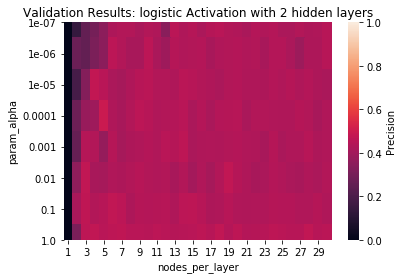

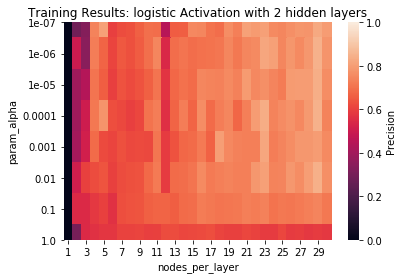

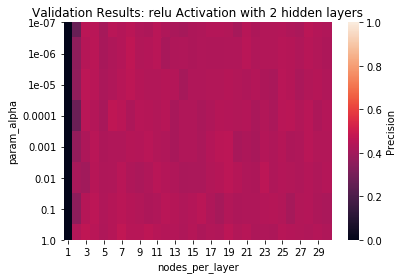

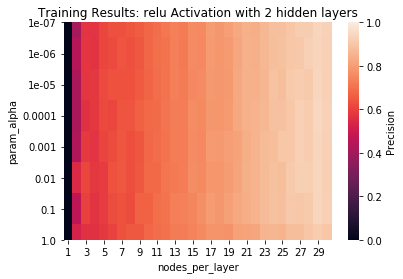

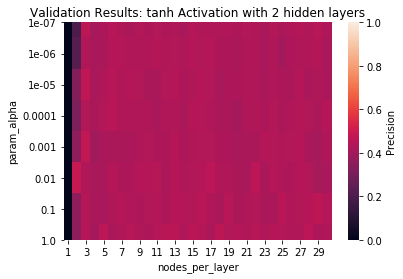

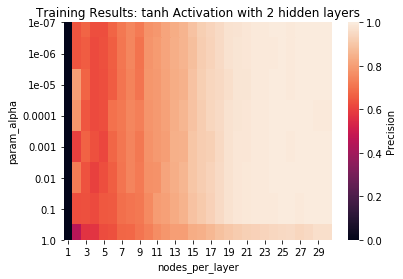

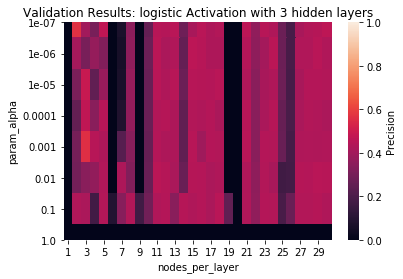

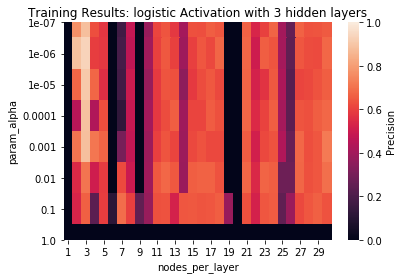

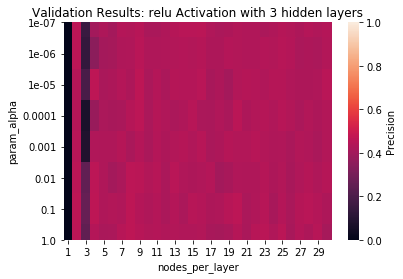

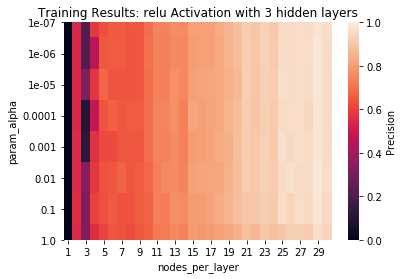

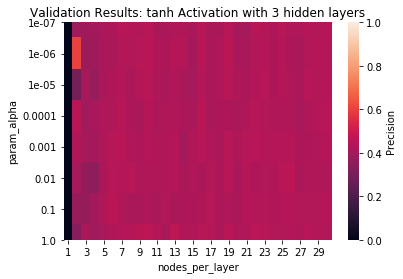

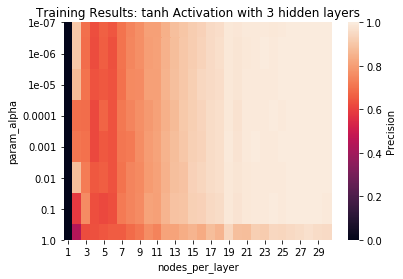

In [20]:
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sns

nn_search_results.to_csv('nnresults.csv')

def plot_nn_search_results(search, results):
    results = results.copy()
 
    results['validation_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[0], axis=1)
    results['validation_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_test_score, scale=row.std_test_score)[1], axis=1)
    results['train_lower_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[0], axis=1)
    results['train_upper_ci'] = results.apply(lambda row: t.interval(0.95, search.n_splits_ - 1, loc=row.mean_train_score, scale=row.std_train_score)[1], axis=1)
    results.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score',
       'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score'], axis=1, inplace=True)
    
    results['num_hidden_layers'] = results.apply(lambda row: len(row.param_hidden_layer_sizes), axis=1)
    results['nodes_per_layer'] = results.apply(lambda row: row.param_hidden_layer_sizes[0], axis=1)
                 
    unique_depths = np.unique(results.num_hidden_layers.values)
    unique_activations = np.unique(results.param_activation.values)
    
    unique_heatmaps = [(depth,activation) for depth in unique_depths for activation in unique_activations]
    
    print(unique_heatmaps)
    print(results.head())
        
    best_nn_combos = pd.DataFrame(columns=results.columns)
    
    for vals in unique_heatmaps:
        df_current = None
        df_current = results.copy()
        df_current = df_current[(df_current.param_activation == vals[1]) & (df_current.num_hidden_layers ==  vals[0])]
        validation_results = df_current.pivot(index='param_alpha', columns='nodes_per_layer', values='mean_test_score')
        train_results = df_current.pivot(index='param_alpha', columns='nodes_per_layer', values='mean_train_score')
        plt.figure()
        ax = plt.axes()
        sns.heatmap(validation_results, cbar_kws={'label': 'Precision'}, ax=ax, vmin=0.0, vmax=1.0)
        ax.set_title('Validation Results: {} Activation with {} hidden layers'.format(vals[1], vals[0]))
        plt.show()
        plt.figure()
        ax = plt.axes()
        sns.heatmap(train_results, cbar_kws={'label': 'Precision'}, ax=ax, vmin=0.0, vmax=1.0)
        ax.set_title('Training Results: {} Activation with {} hidden layers'.format(vals[1], vals[0]))
        plt.show()
        ndx_of_max = df_current.mean_test_score.values.argmax()
        max_row = df_current.iloc[ndx_of_max,:]
        best_nn_combos = best_nn_combos.append(max_row)
        
    return best_nn_combos
    
best_nn_combos = plot_nn_search_results(nn_search, nn_search_results)

     param_activation   param_alpha param_hidden_layer_sizes  mean_test_score  \
244          logistic  1.000000e-04                   (5, 5)         0.496165   
486              relu  1.000000e+00                   (7, 7)         0.476116   
1081             tanh  1.000000e-02                   (2, 2)         0.491715   
451          logistic  1.000000e-07                (2, 2, 2)         0.566908   
818              relu  1.000000e-05                (9, 9, 9)         0.468444   
1351             tanh  1.000000e-06                (2, 2, 2)         0.605988   

      std_test_score  mean_train_score  std_train_score  validation_lower_ci  \
244         0.120979          0.779366         0.174863             0.160273   
486         0.013755          0.639084         0.011312             0.437927   
1081        0.099230          0.723723         0.109708             0.216209   
451         0.161620          0.772982         0.162540             0.118180   
818         0.032958          0.

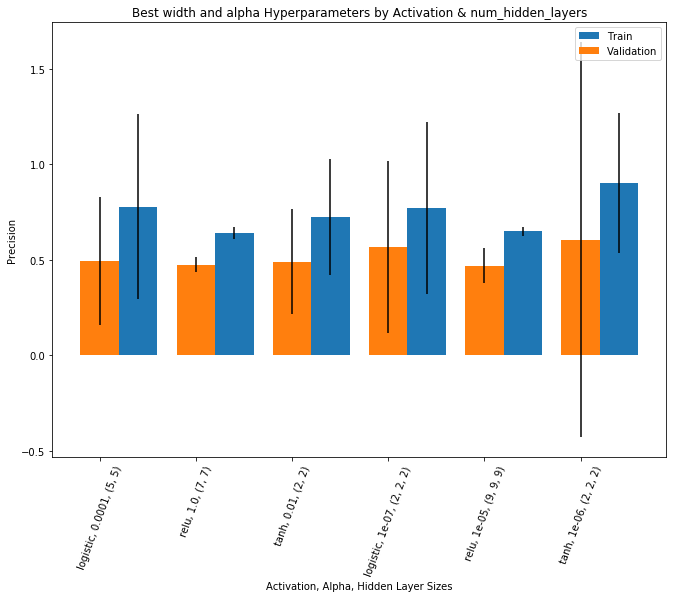

In [21]:
fig = plt.figure(figsize=(11,8))
best_nn_combos['label'] = best_nn_combos.apply(lambda row: '{}, {}, {}'.format(row.param_activation, row.param_alpha, row.param_hidden_layer_sizes), axis=1)
best_nn_combos['val_lower'] = best_nn_combos.mean_test_score - best_nn_combos.validation_lower_ci
best_nn_combos['val_upper'] = best_nn_combos.validation_upper_ci - best_nn_combos.mean_test_score
best_nn_combos['trn_lower'] = best_nn_combos.mean_train_score - best_nn_combos.train_lower_ci
best_nn_combos['trn_upper'] = best_nn_combos.train_upper_ci - best_nn_combos.mean_train_score
print(best_nn_combos)
print([best_nn_combos.validation_lower_ci.values, best_nn_combos.validation_upper_ci.values])
width = 0.4
plt.bar(np.arange(len(best_nn_combos))+width, best_nn_combos.mean_train_score, yerr=[best_nn_combos.trn_lower, best_nn_combos.trn_upper], width=width, tick_label=best_nn_combos.label)
plt.bar(np.arange(len(best_nn_combos)), best_nn_combos.mean_test_score, yerr=[best_nn_combos.val_lower, best_nn_combos.val_upper], width=width, tick_label=best_nn_combos.label)
plt.xticks(rotation=70)
plt.title('Best width and alpha Hyperparameters by Activation & num_hidden_layers')
plt.xlabel('Activation, Alpha, Hidden Layer Sizes')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'])

plt.show()

In [72]:
criteria = (best_nn_combos.param_activation == 'relu') & (best_nn_combos.num_hidden_layers == 2)
print(best_nn_combos[criteria][['mean_test_score', 'validation_lower_ci', 'validation_upper_ci']])

     mean_test_score  validation_lower_ci  validation_upper_ci
486         0.476116             0.437927             0.514305


## Algorithm Performance

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time


kf = KFold(n_splits=3, shuffle=True, random_state=84)
splits = kf.split(X_test_scaled)

results_arr = []
np.random.seed(47)

for train_ind, test_ind in splits:
    X_additional_train_cur = X_test_scaled[train_ind]
    y_additional_train_cur = y_test[train_ind]
    X_test_cur = X_test_scaled[test_ind]
    y_test_cur = y_test[test_ind]
    
    X_train_cur = np.concatenate((X_train_scaled,X_additional_train_cur))
    y_train_cur = np.concatenate((y_train, y_additional_train_cur))
    
    indices = np.arange(0, len(X_train_cur), 1)
    np.random.shuffle(indices)
    
    X_train_cur = X_train_cur[indices]
    y_train_cur = y_train_cur[indices]
    
    pre_boost = time.time()
    boosted = AdaBoostClassifier(random_state=62, learning_rate=0.7, n_estimators=10)
    boosted.fit(X_train_cur, y_train_cur)
    print('Boost Time: {:6.4f}'.format(time.time()-pre_boost))
    
    pre_support = time.time()
    support = SVC(gamma='scale', class_weight='balanced', random_state=75, kernel='linear', C=0.001)
    support.fit(X_train_cur, y_train_cur)
    print('Support Time: {:6.4f}'.format(time.time()-pre_support))
    
    pre_nn = time.time()
    nn = MLPClassifier(solver='lbfgs', random_state=193, hidden_layer_sizes=(7,7,), activation='relu', alpha=1)
    nn.fit(X_train_cur, y_train_cur)
    print('NN Time: {:6.4f}'.format(time.time()-pre_nn))

    boosted_train_predict = boosted.predict(X_train_cur)
    boosted_test_predict = boosted.predict(X_test_cur)
    support_train_predict = support.predict(X_train_cur)
    support_test_predict = support.predict(X_test_cur)
    nn_train_predict = nn.predict(X_train_cur)
    nn_test_predict = nn.predict(X_test_cur)

    boosted_train_precision = precision_score(y_train_cur, boosted_train_predict, pos_label='saved')
    boosted_test_precision = precision_score(y_test_cur, boosted_test_predict, pos_label='saved')
    support_train_precision = precision_score(y_train_cur, support_train_predict, pos_label='saved')
    support_test_precision = precision_score(y_test_cur, support_test_predict, pos_label='saved')
    nn_train_precision = precision_score(y_train_cur, nn_train_predict, pos_label='saved')
    nn_test_precision = precision_score(y_test_cur, nn_test_predict, pos_label='saved')
    
    boosted_train_confusion = confusion_matrix(y_train_cur, boosted_train_predict, labels=['saved', 'unsaved'])
    boosted_test_confusion = confusion_matrix(y_test_cur, boosted_test_predict, labels=['saved', 'unsaved'])
    support_train_confusion = confusion_matrix(y_train_cur, support_train_predict, labels=['saved', 'unsaved'])
    support_test_confusion = confusion_matrix(y_test_cur, support_test_predict, labels=['saved', 'unsaved'])
    nn_train_confusion = confusion_matrix(y_train_cur, nn_train_predict, labels=['saved', 'unsaved'])
    nn_test_confusion = confusion_matrix(y_test_cur, nn_test_predict, labels=['saved', 'unsaved'])
    
    results_cur = {
        'boosted_train_precision' : boosted_train_precision,
        'boosted_test_precision' : boosted_test_precision,
        'support_train_precision' : support_train_precision,
        'support_test_precision' : support_test_precision,
        'nn_train_precision': nn_train_precision,
        'nn_test_precision' : nn_test_precision,
        'boosted_train_confusion' : boosted_train_confusion,
        'boosted_test_confusion' : boosted_test_confusion,
        'support_train_confusion' : support_train_confusion,
        'support_test_confusion' : support_test_confusion,
        'nn_train_confusion' : nn_train_confusion,
        'nn_test_confusion' : nn_test_confusion
    }
    

    results_arr.append(results_cur)

df_algo_compare = pd.DataFrame(results_arr)

Boost Time: 0.1078
Support Time: 0.3690
NN Time: 0.3975
Boost Time: 0.0800
Support Time: 0.3530
NN Time: 0.3924
Boost Time: 0.0800
Support Time: 0.3949
NN Time: 0.4324


In [8]:
mean_algo_results = np.mean(df_algo_compare)
std_algo_results = np.std(df_algo_compare)

from scipy.stats import t


data = {
    'boosted': {
        'mean_test': mean_algo_results.boosted_test_precision,
        'mean_train': mean_algo_results.boosted_train_precision,
        'lower_test_ci': t.interval(0.95, 2, loc=mean_algo_results.boosted_test_precision,
                                    scale=std_algo_results.boosted_test_precision)[0],
        'upper_test_ci': t.interval(0.95, 2, loc=mean_algo_results.boosted_test_precision,
                                    scale=std_algo_results.boosted_test_precision)[1],
        'lower_train_ci': t.interval(0.95, 2, loc=mean_algo_results.boosted_train_precision,
                                    scale=std_algo_results.boosted_train_precision)[0],
        'upper_train_ci': t.interval(0.95, 2, loc=mean_algo_results.boosted_train_precision,
                                    scale=std_algo_results.boosted_train_precision)[1],
        'test_confusion': mean_algo_results.boosted_test_confusion,
        'train_confusion': mean_algo_results.boosted_train_confusion
    },
    'support': {
        'mean_test': mean_algo_results.support_test_precision,
        'mean_train': mean_algo_results.support_train_precision,
        'lower_test_ci': t.interval(0.95, 2, loc=mean_algo_results.support_test_precision,
                                    scale=std_algo_results.support_test_precision)[0],
        'upper_test_ci': t.interval(0.95, 2, loc=mean_algo_results.support_test_precision,
                                    scale=std_algo_results.support_test_precision)[1],
        'lower_train_ci': t.interval(0.95, 2, loc=mean_algo_results.support_train_precision,
                                    scale=std_algo_results.support_train_precision)[0],
        'upper_train_ci': t.interval(0.95, 2, loc=mean_algo_results.support_train_precision,
                                    scale=std_algo_results.support_train_precision)[1],
        'test_confusion': mean_algo_results.support_test_confusion,
        'train_confusion': mean_algo_results.support_train_confusion
    },
    'nn': {
        'mean_test': mean_algo_results.nn_test_precision,
        'mean_train': mean_algo_results.nn_train_precision,
        'lower_test_ci': t.interval(0.95, 2, loc=mean_algo_results.nn_test_precision,
                                    scale=std_algo_results.nn_test_precision)[0],
        'upper_test_ci': t.interval(0.95, 2, loc=mean_algo_results.nn_test_precision,
                                    scale=std_algo_results.nn_test_precision)[1],
        'lower_train_ci': t.interval(0.95, 2, loc=mean_algo_results.nn_train_precision,
                                    scale=std_algo_results.nn_train_precision)[0],
        'upper_train_ci': t.interval(0.95, 2, loc=mean_algo_results.nn_train_precision,
                                    scale=std_algo_results.nn_train_precision)[1],
        'test_confusion': mean_algo_results.nn_test_confusion,
        'train_confusion': mean_algo_results.nn_train_confusion
    }
}

df_algo_results = pd.DataFrame.from_dict(data, orient='index')
df_algo_results['test_upper'] = df_algo_results.mean_test - df_algo_results.lower_test_ci
df_algo_results['test_lower'] = df_algo_results.upper_test_ci - df_algo_results.mean_test
df_algo_results['trn_lower'] = df_algo_results.mean_train - df_algo_results.lower_train_ci
df_algo_results['trn_upper'] = df_algo_results.upper_train_ci - df_algo_results.mean_train
print(df_algo_results)

         mean_test  mean_train  lower_test_ci  upper_test_ci  lower_train_ci  \
boosted   0.500835    0.535338      -0.048358       1.050029        0.502896   
support   0.432468    0.438399       0.300017       0.564920        0.415410   
nn        0.436177    0.590202       0.379476       0.492878        0.543938   

         upper_train_ci                                     test_confusion  \
boosted        0.567780         [[18.0, 185.0], [20.0, 283.3333333333333]]   
support        0.461387       [[187.0, 16.0], [245.0, 58.333333333333336]]   
nn             0.636466  [[55.666666666666664, 147.33333333333334], [71...   

                                           train_confusion  test_upper  \
boosted  [[130.0, 1208.0], [113.33333333333333, 1839.33...    0.549193   
support     [[1230.0, 108.0], [1575.6666666666667, 377.0]]    0.132452   
nn       [[506.3333333333333, 831.6666666666666], [351....    0.056701   

         test_lower  trn_lower  trn_upper  
boosted    0.549193   0.0

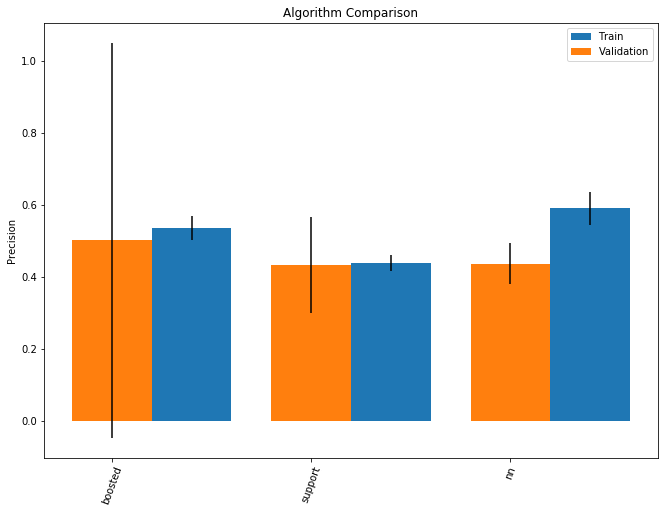

In [11]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(11,8))
width=0.4
plt.bar(np.arange(len(df_algo_results))+width, df_algo_results.mean_train, yerr=[df_algo_results.trn_lower, df_algo_results.trn_upper], width=width, tick_label=df_algo_results.index)
plt.bar(np.arange(len(df_algo_results)), df_algo_results.mean_test, yerr=[df_algo_results.test_lower, df_algo_results.test_upper], width=width, tick_label=df_algo_results.index)
plt.xticks(rotation=70)
plt.title('Algorithm Comparison')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'])

plt.show()

In [12]:
sizes = np.arange(250, 3500, 250)

splits = kf.split(X_test_scaled)

np.random.seed(47)

X_test_cur = X_test_scaled
y_test_cur = y_test

X_train_cur = X_train_scaled
y_train_cur = y_train

indices = np.arange(0, len(X_train_cur), 1)
np.random.shuffle(indices)

X_train_cur = X_train_cur[indices]
y_train_cur = y_train_cur[indices]

results_arr = []
kf = KFold(n_splits=3, shuffle=True, random_state=84)

for size in sizes:    
    #split test data into folds
    splits = kf.split(X_test_scaled)

    size_results = []
    np.random.seed(47)

    for train_ind, test_ind in splits:
        current_results_arr = []

        X_additional_train_cur = X_test_scaled[train_ind]
        y_additional_train_cur = y_test[train_ind]
        X_test_cur = X_test_scaled[test_ind]
        y_test_cur = y_test[test_ind]

        X_train_cur = np.concatenate((X_train_scaled,X_additional_train_cur))
        y_train_cur = np.concatenate((y_train, y_additional_train_cur))

        indices = np.arange(0, len(X_train_cur), 1)
        np.random.shuffle(indices)

        X_train_cur = X_train_cur[indices]
        y_train_cur = y_train_cur[indices]   

        X_train_size = X_train_cur[0:size,:]
        y_train_size = y_train_cur[0:size]

        boosted = AdaBoostClassifier(random_state=62, learning_rate=0.7, n_estimators=10)
        support = SVC(gamma='scale', class_weight='balanced', random_state=75, kernel='linear', C=0.001)
        nn = MLPClassifier(solver='lbfgs', random_state=193, hidden_layer_sizes=(7,7,), activation='relu', alpha=1)

        boosted.fit(X_train_size, y_train_size)
        support.fit(X_train_size, y_train_size)
        nn.fit(X_train_size, y_train_size)

        boosted_train_predict = boosted.predict(X_train_size)
        boosted_test_predict = boosted.predict(X_test_cur)
        support_train_predict = support.predict(X_train_size)
        support_test_predict = support.predict(X_test_cur)
        nn_train_predict = nn.predict(X_train_size)
        nn_test_predict = nn.predict(X_test_cur)

        current_results_arr.append(precision_score(y_train_size, boosted_train_predict, pos_label='saved'))
        current_results_arr.append(precision_score(y_test_cur, boosted_test_predict, pos_label='saved'))
        current_results_arr.append(precision_score(y_train_size, support_train_predict, pos_label='saved'))
        current_results_arr.append(precision_score(y_test_cur, support_test_predict, pos_label='saved'))
        current_results_arr.append(precision_score(y_train_size, nn_train_predict, pos_label='saved'))
        current_results_arr.append(precision_score(y_test_cur, nn_test_predict, pos_label='saved'))
        size_results.append(current_results_arr)
    
    results_arr.append(np.concatenate((np.mean(size_results, axis=0), np.std(size_results, axis=0))))

C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\envs\spotify\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srija\Miniconda3\en

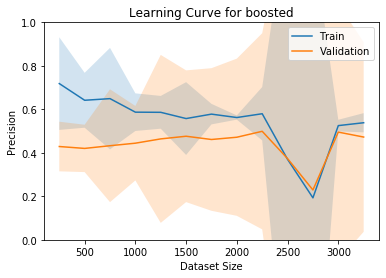

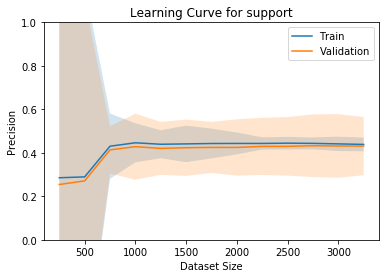

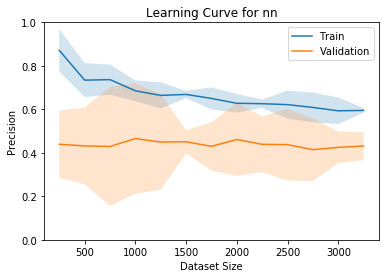

In [13]:
learning_curve_data = pd.DataFrame(results_arr, 
                                   columns=['boosted_train', 'boosted_test', 'support_train', 
                                            'support_test', 'nn_train', 'nn_test',
                                            'boosted_train_std', 'boosted_test_std', 'support_train_std', 
                                            'support_test_std', 'nn_train_std', 'nn_test_std'])
learning_curve_data['dataset_size'] = sizes

algos = ['boosted', 'support', 'nn']
for col in algos:
    learning_curve_data['{}_test_lower_ci'.format(col)] = learning_curve_data.apply(lambda row: t.interval(0.95, 2, loc=row['{}_test'.format(col)], scale=row['{}_test_std'.format(col)])[0], axis=1)
    learning_curve_data['{}_test_upper_ci'.format(col)] = learning_curve_data.apply(lambda row: t.interval(0.95, 2, loc=row['{}_test'.format(col)], scale=row['{}_test_std'.format(col)])[1], axis=1)
    learning_curve_data['{}_train_lower_ci'.format(col)] = learning_curve_data.apply(lambda row: t.interval(0.95, 2, loc=row['{}_train'.format(col)], scale=row['{}_train_std'.format(col)])[0], axis=1)
    learning_curve_data['{}_train_upper_ci'.format(col)] = learning_curve_data.apply(lambda row: t.interval(0.95, 2, loc=row['{}_train'.format(col)], scale=row['{}_train_std'.format(col)])[1], axis=1)
 
    fig = plt.figure()
    plt.plot(learning_curve_data.dataset_size, learning_curve_data['{}_train'.format(col)])
    plt.plot(learning_curve_data.dataset_size, learning_curve_data['{}_test'.format(col)])
    title = 'Learning Curve for {}'.format(col)
    plt.title(title)
    plt.xlabel('Dataset Size')
    plt.ylabel('Precision')
    plt.ylim(top=1.0)
    plt.ylim(bottom=0.0)
    plt.fill_between(learning_curve_data.dataset_size, learning_curve_data['{}_train_lower_ci'.format(col)], learning_curve_data['{}_train_upper_ci'.format(col)], alpha=0.2)
    plt.fill_between(learning_curve_data.dataset_size, learning_curve_data['{}_test_lower_ci'.format(col)], learning_curve_data['{}_test_upper_ci'.format(col)], alpha=0.2) 
    plt.legend(['Train', 'Validation'])
    plt.show()

In [14]:
print(df_algo_results.test_confusion.boosted)
print(df_algo_results.test_confusion.support)
print(df_algo_results.test_confusion.nn)

[[ 18.         185.        ]
 [ 20.         283.33333333]]
[[187.          16.        ]
 [245.          58.33333333]]
[[ 55.66666667 147.33333333]
 [ 71.66666667 231.66666667]]


Text(0.5, 1, 'Confusion Matrix for NN')

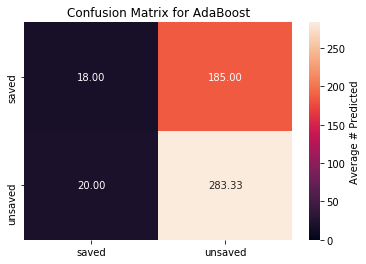

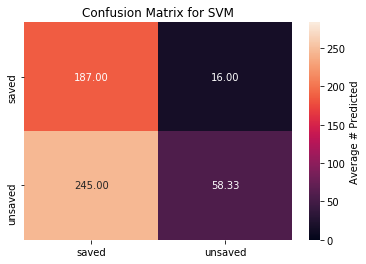

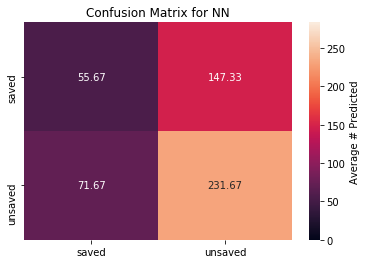

In [33]:
import seaborn as sns

boosted_conf = df_algo_results.test_confusion.boosted
svm_conf = df_algo_results.test_confusion.support
nn_conf = df_algo_results.test_confusion.nn

max_predict = np.max(np.concatenate((boosted_conf,svm_conf,nn_conf)))

plt.figure()
ax = plt.axes()
sns.heatmap(df_algo_results.test_confusion.boosted, cbar_kws={'label':'Average # Predicted'}, ax=ax, 
            annot=True, fmt='.2f', vmin=0, vmax=max_predict, xticklabels=['saved', 'unsaved'],
            yticklabels=['saved', 'unsaved'])
ax.set_title('Confusion Matrix for AdaBoost')

plt.figure()
ax = plt.axes()
sns.heatmap(df_algo_results.test_confusion.support, cbar_kws={'label':'Average # Predicted'}, ax=ax,
            annot=True, fmt='.2f', vmin=0, vmax=max_predict, xticklabels=['saved', 'unsaved'],
            yticklabels=['saved', 'unsaved'])
ax.set_title('Confusion Matrix for SVM')

plt.figure()
ax = plt.axes()
sns.heatmap(df_algo_results.test_confusion.nn, cbar_kws={'label':'Average # Predicted'}, ax=ax,
            annot=True, fmt='.2f', vmin=0, vmax=max_predict, xticklabels=['saved', 'unsaved'],
            yticklabels=['saved', 'unsaved'])
ax.set_title('Confusion Matrix for NN')

In [37]:
print(df_algo_results)

         mean_test  mean_train  lower_test_ci  upper_test_ci  lower_train_ci  \
boosted   0.500835    0.535338      -0.048358       1.050029        0.502896   
support   0.432468    0.438399       0.300017       0.564920        0.415410   
nn        0.436177    0.590202       0.379476       0.492878        0.543938   

         upper_train_ci                                     test_confusion  \
boosted        0.567780         [[18.0, 185.0], [20.0, 283.3333333333333]]   
support        0.461387       [[187.0, 16.0], [245.0, 58.333333333333336]]   
nn             0.636466  [[55.666666666666664, 147.33333333333334], [71...   

                                           train_confusion  test_upper  \
boosted  [[130.0, 1208.0], [113.33333333333333, 1839.33...    0.549193   
support     [[1230.0, 108.0], [1575.6666666666667, 377.0]]    0.132452   
nn       [[506.3333333333333, 831.6666666666666], [351....    0.056701   

         test_lower  trn_lower  trn_upper  
boosted    0.549193   0.0